In [1]:
import pandas as pd
import numpy as onp

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.core.display import HTML

In [2]:
df = pd.read_csv(f'data/rsim.csv')

In [53]:
def plot_egress_histogram(df, devices, dt=25, hist_window_seconds=50):
    """
    Returns an animation of the per device histograms of egress times.
    df - DataFrame of packet traces 
    devices - list of device ids
    dt - how many seconds to advance each frame in the animation 
    hist_window_seconds - sliding window size for lookback to generate histograms
    """
    
    # Get all the packets associated with a given device
    df_ = df.loc[df['cur_hub'].isin(devices)]
    
    fig, axes = plt.subplots(len(devices))
    fig.set_size_inches(8, 3 * len(devices))

    delta_values = (df_['etime'] - df_['timestamp']).values
    bins = onp.linspace(delta_values.min(), delta_values.max(), 30)

    # Compute the number of frames to show in our animation
    min_time, max_time = df_['timestamp'].min(), df_['etime'].max()
    n_frames = int((max_time - min_time - hist_window_seconds) // dt)

    def animate(frame):
        
        start = frame * dt
        end = frame * dt + hist_window_seconds
        for ax, device in zip(axes, devices):
            ax.clear()
            # Select all entries where egress happened between start and end
            sub_df = df_.loc[(df_['cur_hub'] == device) & (df_['etime'] <= end) & (df_['etime'] >= start)]
            delta_times = (sub_df['etime'] - sub_df['timestamp']).values
            ax.hist(delta_times, bins=bins)
            ax.set_ylabel(f"Switch #{device} traffic")
        plt.suptitle(f'Packet Egress times between {start} and {end}')

    anim = animation.FuncAnimation(fig, animate, frames=n_frames)
    return anim
   

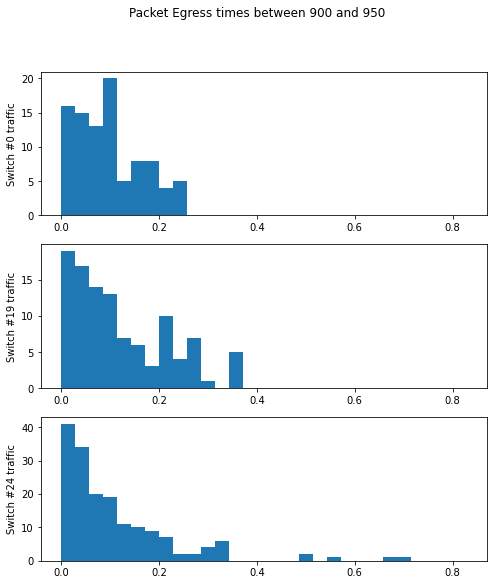

In [54]:
# Select the devices to plot histograms for.
devices = [0, 19, 24]
# Create the animation
anim = plot_egress_histogram(df, devices)
# Plot to jupyter notebook
HTML(animation.Animation.to_jshtml(anim, fps=4))
# Alternatively can save to gif
# anim.save('rsim.gif')